<a href="https://colab.research.google.com/github/A33ana/FDSG1Brainiacs/blob/main/G1B_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

Summary: This dataset comprises features extracted from multiple magnetic resonance imaging (MRI) contrasts for a group of patients suffering from a specific type of brain tumor called Glioblastoma. The objective of this study is to identify imaging biomarkers that could inform on different aspects of the disease such as  **specific mutation status of the tumor** (otherwise only accessible using an invasive biopsy) or **overall survival of these patients**. The features have already been extracted from the images and refer to ‘radiomic features’ characterising the image in the form of 145 characteristics of how the tumor appears on the image of a particular contrast. Such characteristics refer for example to the intensity distribution of the tumor image (mean/max/min, shape of the distribution etc) and are provided for a variety of imaging contrast such as T1, T2, FLAIR, and diffusion imaging.

In the following we try to predict the **the overall survival of the patients.**

Source of the data:
https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=70225642

i) intensity-based features, ii) histogram-related, and iii) volumetric measurements, iv) morphological parameters, and v) textural descriptors. 

In [207]:
!git clone https://github.com/A33ana/FDSG1Brainiacs.git

fatal: destination path 'FDSG1Brainiacs' already exists and is not an empty directory.


In [208]:
# if already unzipped
if(os.path.exists('/content/Project_UPENN/clinFeatures_UPENN.csv') == False):
  !unzip /content/FDSG1Brainiacs/Project_UPENN.zip

#Reading in data

In [209]:
fe_params = pd.read_csv("/content/Project_UPENN/UPENN-GBM_CaPTk_fe_params.csv")
clin_features = pd.read_csv("/content/Project_UPENN/clinFeatures_UPENN.csv") #dtype = {"Survival_from_surgery_days": float})
rad_features = pd.read_csv("/content/Project_UPENN/radFeatures_UPENN.csv")
print("fe_params", fe_params.shape, "clin_features", clin_features.shape, "rad_features", rad_features.shape)

fe_params (28, 6) clin_features (611, 10) rad_features (611, 4753)


#Analyzing data

In [210]:
display("fe_params", fe_params.head()) #explanations of columns?
display("clin_features", clin_features.head()) #y
display("rad_features", rad_features.head()) #X

'fe_params'

,FeatureName,ParamName,Type,Range,Default,Comments
0,Generic,Quantization_Extent,String,Image:ROI,ROI,Whether the quantization of Intensities is sup...
1,Generic,Quantization_Type,String,FixedBinNumber:FixedBinSize:Equal,FixedBinNumber,FixedBinNumber (FBN): the bins are uniformly d...
2,Generic,Resampling,mm,0:10,1.0,Resamples all images and masks to this value o...
3,Generic,ResamplingInterpolator_Image,mm,Nearest:Linear:BSpline,Linear,Type of interpolator to use if resampling is h...
4,Generic,ResamplingInterpolator_Mask,mm,Nearest:NearestLabel:Linear:BSpline,Nearest,Type of interpolator to use if resampling is h...


'clin_features'

,SubjectID,Gender,Age_at_scan_years,Survival_from_surgery_days,IDH1,MGMT,KPS,GTR_over90percent,Time_since_baseline_preop,PsP_TP_score
0,UPENN-GBM-00001_11,F,52.16,Not Available,Wildtype,Not Available,Not Available,Y,0,NaN
1,UPENN-GBM-00002_11,F,61.30,291,Wildtype,Not Available,Not Available,Y,0,NaN
2,UPENN-GBM-00003_11,M,42.82,Not Available,Wildtype,Not Available,Not Available,Y,0,NaN
3,UPENN-GBM-00004_11,M,33.43,Not Available,NOS/NEC,Not Available,Not Available,Y,0,NaN
4,UPENN-GBM-00005_11,M,53.33,Not Available,Wildtype,Not Available,Not Available,Y,0,NaN


'rad_features'

,SubjectID,FLAIR_ED_Intensity_CoefficientOfVariation,FLAIR_ED_Intensity_Energy,FLAIR_ED_Intensity_InterQuartileRange,FLAIR_ED_Intensity_Kurtosis,FLAIR_ED_Intensity_Maximum,FLAIR_ED_Intensity_Mean,FLAIR_ED_Intensity_MeanAbsoluteDeviation,FLAIR_ED_Intensity_Median,FLAIR_ED_Intensity_MedianAbsoluteDeviation,...,DSC_PH_ED_GLSZM_Bins-16_Radius-1_ZoneSizeMean,DSC_PH_ED_GLSZM_Bins-16_Radius-1_ZoneSizeNonUniformity,DSC_PH_ED_GLSZM_Bins-16_Radius-1_ZoneSizeNoneUniformityNormalized,DSC_PH_ED_GLSZM_Bins-16_Radius-1_ZoneSizeVariance,DSC_PH_ED_NGTDM_Busyness,DSC_PH_ED_NGTDM_Coarsness,DSC_PH_ED_NGTDM_Complexity,DSC_PH_ED_NGTDM_Contrast,DSC_PH_ED_NGTDM_Strength,DSC_PH_ED_LBP_Radius-1_Bins-16_LBP
0,UPENN-GBM-00001_11,0.132367,496350786,28,2.614272,223,150.365238,-7.726173e-13,150,0.365238,...,59.930556,59.666667,0.165741,1.186807e+05,159.674492,0.000100,544.462199,0.334864,0.012338,1.997448e+05
1,UPENN-GBM-00002_11,0.183761,5059094750,50,2.191867,255,177.564146,-7.618750e-12,178,-0.435854,...,98.927342,273.911408,0.174577,1.499080e+06,1015.313449,0.000013,545.886998,0.197933,0.002102,1.245890e+06
2,UPENN-GBM-00003_11,0.178541,1285339782,48,2.011637,236,160.387047,-2.585516e-12,164,-3.612953,...,62.805447,153.547341,0.199153,6.902887e+05,446.205555,0.000032,528.910262,0.104093,0.009445,4.014972e+05
3,UPENN-GBM-00004_11,0.178110,604801952,36,2.666624,221,133.854148,7.141096e-13,135,-1.145852,...,46.081690,137.661972,0.193890,7.784522e+04,257.023450,0.000070,527.780251,0.632939,0.006835,2.923168e+05
4,UPENN-GBM-00005_11,0.161688,957903597,29,2.177048,171,117.705824,-8.040465e-13,116,1.705824,...,123.629358,103.957798,0.190748,5.225992e+05,399.581870,0.000024,690.501983,0.801415,0.002235,5.038194e+05


Goal: Get all the column names of the radiomic features
then cluster them according to whether they are:
1)intensity based features, 2)histogram related f.
3)volumetric measurements 4)morphological parameters
5)textural descriptors

In [211]:
column_names = rad_features.columns.tolist()
print(column_names)

['SubjectID', 'FLAIR_ED_Intensity_CoefficientOfVariation', 'FLAIR_ED_Intensity_Energy', 'FLAIR_ED_Intensity_InterQuartileRange', 'FLAIR_ED_Intensity_Kurtosis', 'FLAIR_ED_Intensity_Maximum', 'FLAIR_ED_Intensity_Mean', 'FLAIR_ED_Intensity_MeanAbsoluteDeviation', 'FLAIR_ED_Intensity_Median', 'FLAIR_ED_Intensity_MedianAbsoluteDeviation', 'FLAIR_ED_Intensity_Minimum', 'FLAIR_ED_Intensity_Mode', 'FLAIR_ED_Intensity_NinetiethPercentile', 'FLAIR_ED_Intensity_QuartileCoefficientOfVariation', 'FLAIR_ED_Intensity_Range', 'FLAIR_ED_Intensity_RootMeanSquare', 'FLAIR_ED_Intensity_Skewness', 'FLAIR_ED_Intensity_StandardDeviation', 'FLAIR_ED_Intensity_Sum', 'FLAIR_ED_Intensity_TenthPercentile', 'FLAIR_ED_Intensity_Variance', 'FLAIR_ED_Histogram_Bins-16_Bins-16_Bin-0_Frequency', 'FLAIR_ED_Histogram_Bins-16_Bins-16_Bin-0_Probability', 'FLAIR_ED_Histogram_Bins-16_Bins-16_Bin-10_Frequency', 'FLAIR_ED_Histogram_Bins-16_Bins-16_Bin-10_Probability', 'FLAIR_ED_Histogram_Bins-16_Bins-16_Bin-11_Frequency', 'FLA

##Removing missing values

Explaining the column names:
KPS: Karnofsky performance score prior to treatment
IDH1: molecular status for Isocitrate dehydrogenase 1 (IDH1) mutations
MGMT: methylation of the O(6)-Methylguanine-DNA methyltransferase (MGMT)
FLAIR: Die FLAIR (Fluid Attenuated Inversion Recovery) Sequenz, ist eine spezielle MRT Sequenz, welche der T2 Sequenz sehr ähnlich ist, jedoch, dass das Signal von Liquor genullt wird und somit schwarz erscheint (Die FLAIR Sequenz eignet sich gut zur Demonstration von Abnormalitäten im Liquor. MS Plaques, Läsionen der weißen Substanz, Tumore, Ödeme, Enzephalomalazie, Gliose und akute Infarkte erscheinen als helles Signal in der FLAIR Sequenz).

Some data has "Not Available", which means it is missing data. We turn those into nans so we can easily quantify and work with it.


In [212]:
clin_features = clin_features.replace('Not Available', np.nan)
rad_features = rad_features.replace('Not Available', np.nan)

In [213]:
display(clin_features.isna().sum())
display(clin_features.describe())
print(clin_features.shape)

SubjectID                       0
Gender                          0
Age_at_scan_years               0
Survival_from_surgery_days    159
IDH1                            0
MGMT                          322
KPS                           536
GTR_over90percent              38
Time_since_baseline_preop       0
PsP_TP_score                  611
dtype: int64

,Age_at_scan_years,Time_since_baseline_preop,PsP_TP_score
count,611.000000,611.0,0.0
mean,62.977594,0.0,NaN
std,12.424672,0.0,NaN
min,18.650000,0.0,NaN
25%,55.910000,0.0,NaN
50%,63.580000,0.0,NaN
75%,71.665000,0.0,NaN
max,88.500000,0.0,NaN


(611, 10)


PsP_TP score has only missing data, so we remove it. Also KPS is mostly missing data, so we remove it too. We remove SubjectID because the IDs are the same. Time_since_baseline_preop is also getting removed because std is 0.

In [214]:
clin_features =clin_features.drop(["PsP_TP_score", "KPS", "SubjectID", "Time_since_baseline_preop" ] , axis=1)
rad_features.drop("SubjectID", axis =1, inplace=True)
display(clin_features.isna().sum())
print(clin_features.dtypes)

Gender                          0
Age_at_scan_years               0
Survival_from_surgery_days    159
IDH1                            0
MGMT                          322
GTR_over90percent              38
dtype: int64

Gender                         object
Age_at_scan_years             float64
Survival_from_surgery_days     object
IDH1                           object
MGMT                           object
GTR_over90percent              object
dtype: object


We remove those columns in rad_features that contain Standard Deviation ==0 because they do not help the model predict better and the create problem when doing feature selection

In [215]:
print("before", rad_features.shape)
index = rad_features[rad_features["FLAIR_ED_Morphologic_PerimeterOnBorder"]!=0].index
print("index to remove", index)
rad_features = rad_features.drop(index, axis=0)
clin_features = clin_features.drop(index, axis=0)
col_index = rad_features.columns[rad_features.std(axis=0)==0] #Columns where standard deviation is 0-> means unhelpful information
print("How many columns have std==0 : ", col_index.shape)
display("Column index", col_index)
rad_features = rad_features.drop(columns =col_index)
print("after", rad_features.shape)

before (611, 4752)
index to remove Int64Index([562], dtype='int64')
How many columns have std==0 :  (264,)


'Column index'

Index(['FLAIR_ED_Histogram_Bins-16_Bins-16_Maximum',
       'FLAIR_ED_Histogram_Bins-16_Bins-16_Minimum',
       'FLAIR_ED_Histogram_Bins-16_Bins-16_Range',
       'FLAIR_ED_Morphologic_OrientedBoundingBoxSize_Axis-0',
       'FLAIR_ED_Morphologic_OrientedBoundingBoxSize_Axis-1',
       'FLAIR_ED_Morphologic_OrientedBoundingBoxSize_Axis-2',
       'FLAIR_ED_Morphologic_PerimeterOnBorder',
       'FLAIR_ED_Morphologic_PerimeterOnBorderRatio',
       'FLAIR_ED_Morphologic_PixelsOnBorder',
       'T1_ED_Histogram_Bins-16_Bins-16_Maximum',
       ...
       'T1GD_ET_Morphologic_PixelsOnBorder',
       'DSC_PH_ED_Histogram_Bins-16_Bins-16_Maximum',
       'DSC_PH_ED_Histogram_Bins-16_Bins-16_Minimum',
       'DSC_PH_ED_Histogram_Bins-16_Bins-16_Range',
       'DSC_PH_ED_Morphologic_OrientedBoundingBoxSize_Axis-0',
       'DSC_PH_ED_Morphologic_OrientedBoundingBoxSize_Axis-1',
       'DSC_PH_ED_Morphologic_OrientedBoundingBoxSize_Axis-2',
       'DSC_PH_ED_Morphologic_PerimeterOnBorder',
   

after (610, 4488)


In [216]:
col_index = rad_features.columns[rad_features.std(axis=0)==0]
print(col_index.shape)

(0,)


Dropping rows where NaN in Survival (#and GTR.)

In [217]:
#indexes where notna in Survival and GTR
indexes_keep = (clin_features["Survival_from_surgery_days"].notna()) #& clin_features["GTR_over90percent"].notna())
clin_features = clin_features[indexes_keep]
rad_features = rad_features[indexes_keep]
print(clin_features.shape)
print(clin_features.head())


(451, 6)
   Gender  Age_at_scan_years Survival_from_surgery_days      IDH1 MGMT  \
1       F              61.30                        291  Wildtype  NaN   
5       M              52.99                        626  Wildtype  NaN   
7       F              55.06                        469  Wildtype  NaN   
8       M              69.12                        561  Wildtype  NaN   
10      F              39.61                        798   NOS/NEC  NaN   

   GTR_over90percent  
1                  Y  
5                  Y  
7                  Y  
8                  Y  
10                 Y  


Survival_from_surgery_days is of datatype object, so need to change to float

In [218]:
clin_features = clin_features.astype({"Survival_from_surgery_days": float})
display(clin_features.isna().sum())

Gender                          0
Age_at_scan_years               0
Survival_from_surgery_days      0
IDH1                            0
MGMT                          217
GTR_over90percent              28
dtype: int64

In [219]:
display(clin_features["Survival_from_surgery_days"].head())
display(clin_features["Survival_from_surgery_days"].describe())

1     291.0
5     626.0
7     469.0
8     561.0
10    798.0
Name: Survival_from_surgery_days, dtype: float64

count     451.000000
mean      423.022173
std       355.187455
min         3.000000
25%       158.500000
50%       368.000000
75%       555.000000
max      2207.000000
Name: Survival_from_surgery_days, dtype: float64

##Survival Distribution

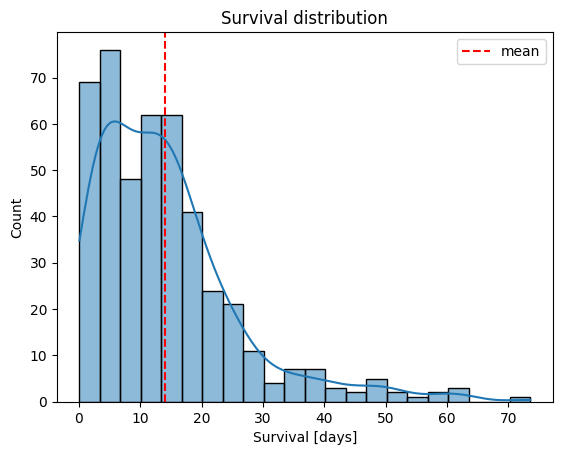

In [220]:
hist = sns.histplot(
    x=clin_features["Survival_from_surgery_days"]/30,
    kde=True
)
hist.set(xlabel='Survival [days]', ylabel='Count', title='Survival distribution')
plt.plot()
plt.axvline(x=(clin_features["Survival_from_surgery_days"]/30).mean(),
            color='red', label ="mean", ls='--')
plt.legend()
plt.savefig('SurvivalDistributionMonths.png')

In [221]:
print(422.165929/30)
print(2207/30)

14.072197633333333
73.56666666666666


We have decided to convert the days in Survival_from_surgery_days into two categories. The two categories: Short survival and long survival(encompassing intermediate and long survival seen in other papers).

https://arxiv.org/pdf/1811.02629.pdf

Here they mention an accuracy of 0.6 for the top 5 approaches. Random choice would be 0.33 (3-class classification)

https://www.spiedigitallibrary.org/journals/journal-of-medical-imaging/volume-7/issue-03/031505/Overall-survival-prediction-in-glioblastoma-patients-using-structural-magnetic-resonance/10.1117/1.JMI.7.3.031505.full?SSO=1

Another paper predicting OS

print(12*30)
print(14*30)
print(720/30)


In [222]:
bins = pd.IntervalIndex.from_tuples([(0, 30*12), (30*12,clin_features["Survival_from_surgery_days"].max() )])
categories = ['short', 'long']
clin_features["Survival_from_surgery_days"] = pd.cut(clin_features["Survival_from_surgery_days"], bins=bins, labels = categories).cat.rename_categories(categories)
display(clin_features.head())

,Gender,Age_at_scan_years,Survival_from_surgery_days,IDH1,MGMT,GTR_over90percent
1,F,61.30,short,Wildtype,NaN,Y
5,M,52.99,long,Wildtype,NaN,Y
7,F,55.06,long,Wildtype,NaN,Y
8,M,69.12,long,Wildtype,NaN,Y
10,F,39.61,long,NOS/NEC,NaN,Y


In [223]:
catcol=[]
def categorise(data):
  for i in data.columns:
        if data[i].dtype == 'object' or data[i].dtype == 'bool': #turn object/string into categorical
              data[i] = pd.Categorical(data[i])
              #print(i, pd.Categorical(data[i]).categories)
              catcol.append(i)
categorise(clin_features)

for i in clin_features.columns:
  if clin_features[i].dtype == 'category':
    print(i, pd.Categorical(clin_features[i]).categories)
catcol = ["Gender", "IDH1", "MGMT", "GTR_over90percent", "Survival_from_surgery_days"]

Gender Index(['F', 'M'], dtype='object')
Survival_from_surgery_days Index(['short', 'long'], dtype='object')
IDH1 Index(['Mutated', 'NOS/NEC', 'Wildtype'], dtype='object')
MGMT Index(['Indeterminate', 'Methylated', 'Unmethylated'], dtype='object')
GTR_over90percent Index(['N', 'Y'], dtype='object')


(3, 2)
M    274
F    177
Name: Gender, dtype: int64


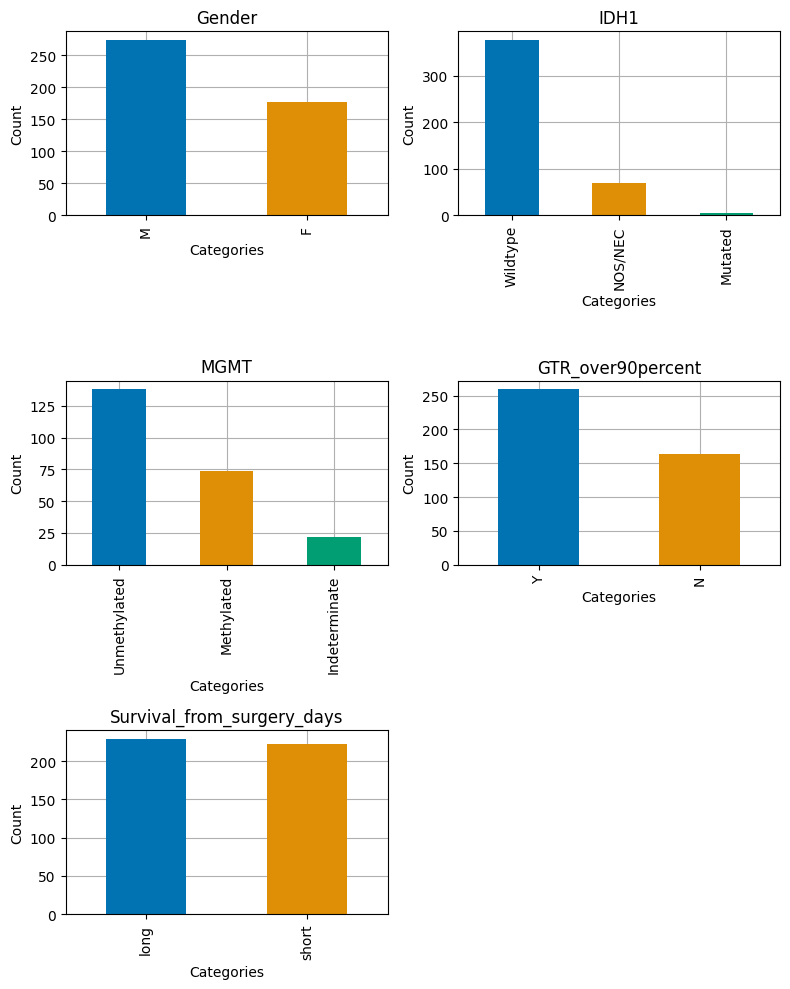

In [224]:
fig, ax = plt.subplots(3,2, figsize=(8, 10))

print(ax.shape)
print(clin_features[catcol[0]].value_counts())
colors=sns.color_palette("colorblind")
#ax[0,0].grid()
ax[0,0].set_axisbelow(True)
ax[0,0].set(xlabel="Categories", ylabel="Count", title=catcol[0])
#ax[0,0]
clin_features[catcol[0]].value_counts().plot(ax=ax[0,0], kind="bar", color=colors, grid=True)
ax[0,1].set_title(catcol[1])
ax[0,1].set_axisbelow(True)
ax[0,1].set(xlabel="Categories", ylabel="Count")
clin_features[catcol[1]].value_counts().plot(ax=ax[0,1], kind="bar", color=colors, grid=True)
ax[1,0].set_title(catcol[2])
ax[1,0].set_axisbelow(True)
ax[1,0].set(xlabel="Categories", ylabel="Count")
clin_features[catcol[2]].value_counts().plot(ax=ax[1,0], kind="bar", color=colors, grid=True)
ax[1,1].set_title(catcol[3])
ax[1,1].set_axisbelow(True)
ax[1,1].set(xlabel="Categories", ylabel="Count")
clin_features[catcol[3]].value_counts().plot(ax=ax[1,1], kind="bar", color=colors, grid=True)

ax[2,0].set_title(catcol[4])
ax[2,0].set_axisbelow(True)
ax[2,0].set(xlabel="Categories", ylabel="Count")
clin_features[catcol[4]].value_counts().plot(ax=ax[2,0], kind="bar", color=colors, grid=True)
fig.delaxes(ax[2,1])
fig.tight_layout()
plt.savefig("ClassRatios.png")
plt.show()

##Categories into Integer encoding


Each unique category value is assigned an integer value in Survival. So short becomes 0, and long becomes 1, and missing becomes -1.

In [225]:
def numberify_codes(data):
  for i in data.columns:
        if data[i].dtype == 'category': 
          print("name of column", data[i].name)
          data[i] = data[i].cat.codes
  return data
display(clin_features)
clin_features_codes =numberify_codes(clin_features)
display(clin_features_codes)

,Gender,Age_at_scan_years,Survival_from_surgery_days,IDH1,MGMT,GTR_over90percent
1,F,61.30,short,Wildtype,NaN,Y
5,M,52.99,long,Wildtype,NaN,Y
7,F,55.06,long,Wildtype,NaN,Y
8,M,69.12,long,Wildtype,NaN,Y
10,F,39.61,long,NOS/NEC,NaN,Y
...,...,...,...,...,...,...
600,M,59.69,long,Wildtype,NaN,Y
601,M,77.19,short,Wildtype,Methylated,NaN
603,F,62.00,short,Wildtype,Unmethylated,NaN
608,M,29.01,short,Wildtype,Unmethylated,N


name of column Gender
name of column Survival_from_surgery_days
name of column IDH1
name of column MGMT
name of column GTR_over90percent


,Gender,Age_at_scan_years,Survival_from_surgery_days,IDH1,MGMT,GTR_over90percent
1,0,61.30,0,2,-1,1
5,1,52.99,1,2,-1,1
7,0,55.06,1,2,-1,1
8,1,69.12,1,2,-1,1
10,0,39.61,1,1,-1,1
...,...,...,...,...,...,...
600,1,59.69,1,2,-1,1
601,1,77.19,0,2,1,-1
603,0,62.00,0,2,2,-1
608,1,29.01,0,2,2,0


Add GTR column to rad_features so can be used for prediction

In [226]:
#rad_features["GTR_over90percent"] = clin_features["GTR_over90percent"]

In [227]:
print(clin_features.shape)
print(rad_features.shape)

(451, 6)
(451, 4488)


In [228]:
display(rad_features.isna().sum())

FLAIR_ED_Intensity_CoefficientOfVariation      0
FLAIR_ED_Intensity_Energy                      0
FLAIR_ED_Intensity_InterQuartileRange          0
FLAIR_ED_Intensity_Kurtosis                    0
FLAIR_ED_Intensity_Maximum                     0
                                            ... 
DSC_PH_ED_NGTDM_Coarsness                    113
DSC_PH_ED_NGTDM_Complexity                   113
DSC_PH_ED_NGTDM_Contrast                     113
DSC_PH_ED_NGTDM_Strength                     113
DSC_PH_ED_LBP_Radius-1_Bins-16_LBP           113
Length: 4488, dtype: int64

##Data Imputation

In [229]:
from sklearn.impute import KNNImputer

def replace_by_mean(data):
  for i in data.columns:
    data[i].fillna(data[i].mean(), inplace=True)
  return data
def replace_by_imputation(data):
  imputer = KNNImputer(n_neighbors=25, weights="uniform")
  data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
  return data
rad_features = replace_by_imputation(rad_features)
display(rad_features.isna().sum())

FLAIR_ED_Intensity_CoefficientOfVariation    0
FLAIR_ED_Intensity_Energy                    0
FLAIR_ED_Intensity_InterQuartileRange        0
FLAIR_ED_Intensity_Kurtosis                  0
FLAIR_ED_Intensity_Maximum                   0
                                            ..
DSC_PH_ED_NGTDM_Coarsness                    0
DSC_PH_ED_NGTDM_Complexity                   0
DSC_PH_ED_NGTDM_Contrast                     0
DSC_PH_ED_NGTDM_Strength                     0
DSC_PH_ED_LBP_Radius-1_Bins-16_LBP           0
Length: 4488, dtype: int64

No more missing data in radiological features! :D

In [230]:
X = rad_features
y = clin_features["Survival_from_surgery_days"]

print("X", X.shape)
print("y", y.shape)

X (451, 4488)
y (451,)


#Train Test split

In [246]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train", X_train.shape,"X_test",  X_test.shape, "y_train", y_train.shape, "y_test", y_test.shape)

X_train (338, 4488) X_test (113, 4488) y_train (338,) y_test (113,)


##Standardize Data

In [247]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_columns= X.columns
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_columns)

#Feature Selection

SelectKBest feature selection calculates the F-value between each feature and the target variable (in this case, y_train). It then chooses the k best features based on the F-values.

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 631  632  634 1849 1850 1852 1987 1988 1990 2125 2126 2128 2263 2264
 2266 2536 2537 2539 2674 2675 2677 2947 2948 2950 3490 3491 3493 3763
 3764 3766 4171 4172 4174] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Selected Features: ['DTI_AD_ET_Intensity_Skewness', 'DTI_AD_ET_Histogram_Bins-16_Bins-16_RobustMeanAbsoluteDeviation1090', 'DTI_AD_ET_Histogram_Bins-16_Bins-16_SeventyFifthPercentile', 'DTI_AD_ET_Histogram_Bins-16_Bins-16_Skewness', 'DTI_AD_ET_GLCM_Bins-16_Radius-1_AutoCorrelation', 'DTI_TR_ET_GLCM_Bins-16_Radius-1_AutoCorrelation', 'DSC_PSR_ET_Histogram_Bins-16_Bins-16_Bin-10_Frequency', 'FLAIR_NC_GLRLM_Bins-16_Radius-1_ShortRunEmphasis', 'DTI_AD_NC_GLRLM_Bins-16_Radius-1_LongRunHighGreyLevelEmphasis', 'T2_ET_Histogram_Bins-16_Bins-16_NinetiethPercentile', 'T2_ET_Histogram_Bins-16_Bins-16_RootMeanSquare', 'T2_ET_GLRLM_Bins-16_Radius-1_HighGreyLevelRunEmphasis', 'T2_ET_GLRLM_Bins-16_Radius-1_LongRunHighGreyLevelEmphasis', 'DTI_RD_ET_Histogram_Bins-16_Bins-16_NinetiethPercentile', 'DTI_RD_ET_Histogram_Bins-16_Bins-16_RootMeanSquare', 'DTI_RD_ET_Histogram_Bins-16_Bins-16_SeventyFifthPercentile', 'DTI_RD_ET_GLCM_Bins-16_Radius-1_AutoCorrelation', 'DTI_RD_ET_GLRLM_Bins-16_Radius-1_LongRunH

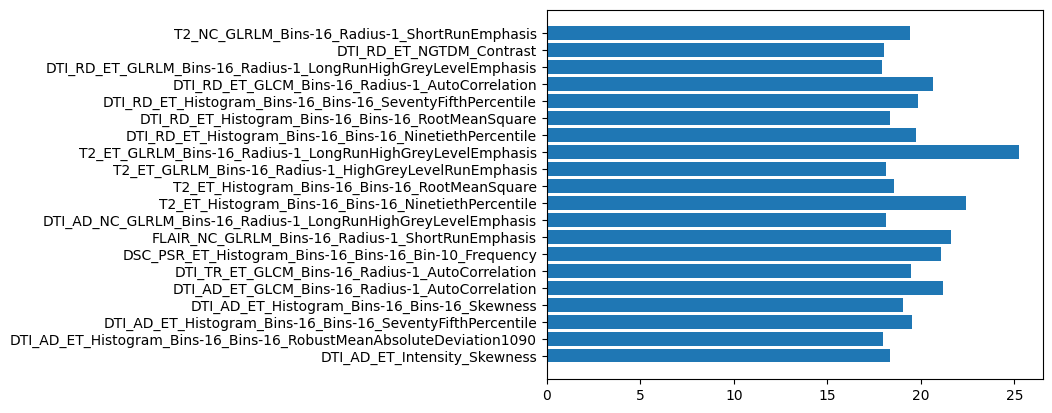

In [248]:
from sklearn.feature_selection import SelectKBest, f_classif

# X is your feature matrix and y is your target variable
# Assuming X has both categorical and numeric features

# Perform feature selection using f_classif
k = 20  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
#selected_feature_indices = np.argsort(selector.scores_)[::-1]

#Print scores of selected features
scores = selector.scores_[selected_feature_indices]

# Get the names of the selected features
selected_features = [X_train.columns[i] for i in selected_feature_indices]

# Print the selected features
print("Selected Features:", selected_features)

plt.barh(selected_features, scores, align='center')

#select those features for X_train and X_test
X_train = X_train[selected_features]
X_test = X_test[selected_features]

#Machine Learning

In [234]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
# Look at some additional evaluation metrics
def eval_Performance(y_eval, X_eval, clf):

    y_pred = clf.predict(X_eval)
    y_pred_proba = clf.predict_proba(X_eval)[:, 1]
    tn, fp, fn, tp = confusion_matrix(y_eval, y_pred).ravel()

    # Evaluation
    accuracy  = accuracy_score(y_eval, y_pred)
    precision = precision_score(y_eval, y_pred)
    recall    = recall_score(y_eval, y_pred)
    f1        = f1_score(y_eval, y_pred)
    fp_rates, tp_rates, _ = roc_curve(y_eval, y_pred_proba)

    # Calculate the area under the roc curve using a sklearn function
    roc_auc = auc(fp_rates, tp_rates)

    return tp,fp,tn,fn,accuracy, precision, recall, f1, roc_auc

In [235]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
  svm.SVC(probability=True, kernel = 'linear'),
  LogisticRegression(penalty='l1', solver='liblinear'),
  KNeighborsClassifier(n_neighbors=2),
  KNeighborsClassifier(n_neighbors=5),
  tree.DecisionTreeClassifier(criterion ="gini"),
  LogisticRegression(max_iter=3000),
  SVC(gamma='auto', probability=True),
  SVC(class_weight='balanced', probability=True),
  GaussianNB(),
  MLPClassifier(random_state=1, max_iter=70),
  RandomForestClassifier()
    ]

df_performance_test = pd.DataFrame(columns = ['tp','fp','tn','fn','accuracy', 'precision', 'recall', 'f1', 'roc_auc'] )
df_performance_train = pd.DataFrame(columns = ['tp','fp','tn','fn','accuracy', 'precision', 'recall', 'f1', 'roc_auc'] )

for i, model in enumerate(models):
  model.fit(X_train, y_train)
  df_performance_train.loc["Train " + str(model),:] = eval_Performance(y_train, X_train, model)
  df_performance_test.loc["Test " + str(model),:] = eval_Performance(y_test, X_test, model)
display("Predicting Survival")
display(df_performance_test)
display(df_performance_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(


'Predicting Survival'

,tp,fp,tn,fn,accuracy,precision,recall,f1,roc_auc
"Test SVC(kernel='linear', probability=True)",33,19,35,26,0.60177,0.634615,0.559322,0.594595,0.678751
"Test LogisticRegression(penalty='l1', solver='liblinear')",37,22,32,22,0.610619,0.627119,0.627119,0.627119,0.66855
Test KNeighborsClassifier(n_neighbors=2),22,13,41,37,0.557522,0.628571,0.372881,0.468085,0.599812
Test KNeighborsClassifier(),35,22,32,24,0.59292,0.614035,0.59322,0.603448,0.595731
Test DecisionTreeClassifier(),35,34,20,24,0.486726,0.507246,0.59322,0.546875,0.481795
Test LogisticRegression(max_iter=3000),36,21,33,23,0.610619,0.631579,0.610169,0.62069,0.666667
"Test SVC(gamma='auto', probability=True)",39,28,26,20,0.575221,0.58209,0.661017,0.619048,0.64344
"Test SVC(class_weight='balanced', probability=True)",38,28,26,21,0.566372,0.575758,0.644068,0.608,0.644068
Test GaussianNB(),24,14,40,35,0.566372,0.631579,0.40678,0.494845,0.626491
"Test MLPClassifier(max_iter=70, random_state=1)",36,24,30,23,0.584071,0.6,0.610169,0.605042,0.657564


,tp,fp,tn,fn,accuracy,precision,recall,f1,roc_auc
"Train SVC(kernel='linear', probability=True)",102,49,119,68,0.653846,0.675497,0.6,0.635514,0.755567
"Train LogisticRegression(penalty='l1', solver='liblinear')",109,48,120,61,0.677515,0.694268,0.641176,0.666667,0.746078
Train KNeighborsClassifier(n_neighbors=2),106,0,168,64,0.810651,1.0,0.623529,0.768116,0.913725
Train KNeighborsClassifier(),121,36,132,49,0.748521,0.770701,0.711765,0.740061,0.809611
Train DecisionTreeClassifier(),170,0,168,0,1.0,1.0,1.0,1.0,1.0
Train LogisticRegression(max_iter=3000),112,49,119,58,0.683432,0.695652,0.658824,0.676737,0.749965
"Train SVC(gamma='auto', probability=True)",121,45,123,49,0.721893,0.728916,0.711765,0.720238,0.796831
"Train SVC(class_weight='balanced', probability=True)",119,43,125,51,0.721893,0.734568,0.7,0.716867,0.796289
Train GaussianNB(),66,29,139,104,0.606509,0.694737,0.388235,0.498113,0.70688
"Train MLPClassifier(max_iter=70, random_state=1)",113,45,123,57,0.698225,0.71519,0.664706,0.689024,0.808123


11
(11,)


Text(0.5, 1.0, 'Accuracy Scores of Machine Learning Models')

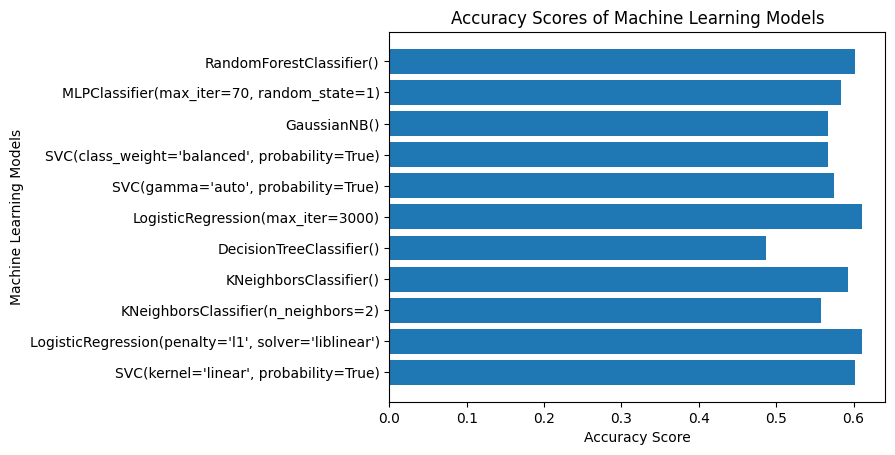

In [236]:
modelnames = [str(model) for model in models]
print(len(modelnames))
print(df_performance_test["accuracy"].shape)
plt.barh(modelnames, df_performance_test["accuracy"])
plt.xlabel('Accuracy Score')
plt.ylabel('Machine Learning Models')
plt.title('Accuracy Scores of Machine Learning Models')

#Code from Homework06 for Classification

In [237]:
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os
from sklearn.cluster import DBSCAN
import pandas as pd

def plot_cluster_vs_actual_class(X, y_true, cluster_labels, algorithm, unsupervised_score, supervised_score):
    """
    Plots the true classes vs the groups found by kmeans.

    Parameters:
        X (numpy array): The data to be clustered.
        y (numpy array): True classes
        cluster_labels (numpy array): The labels assigned by the clustering algorithm
        score (float): clustering score
        algorithm (string): "KMeans" or "DBSCAN"
        unsupervised_score: score to measure clustering performances without using the class labels. These metrics evaluate
                            for example the comparison between the distances among the samples grouped in the same cluster
                            with the distances among samples that belong to different clusters
                            Have a look at scikit-learn docs:
                            https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
        supervised_score: it can be calculated only if you know the class labels as in this case. A famous score
                          is the adjusted rand index (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)
                          which basically evaluates how well clusters are formed with respect to the true labels. If 1 you have a perfect match
    """
    # compute number of clusters
    # TODO: compute how many clusters the algorithm found.
    n_clusters = len(np.unique(cluster_labels))

    # TODO: create a figure with 2 subplots and size (12, 8)
    fig, axes = plt.subplots(1,2, figsize=(12,8))
    # 1st Plot showing the actual clusters formed.
    # check X shape. If it is already 2 dimensional it means that we already applied PCA or the dataset has only 2 features
    # Leave this part as it is
    if X.shape[1] != 2:
        # apply PCA for visualization purposes
        X_plot = PCA(n_components=2).fit_transform(X)
    else:
        X_plot = X.copy()

    # create legend labels using the cluster assigned
    cluster_labels_plot = [f'cluster {i}' for i in cluster_labels]

    # sort the labels from lowest to highest
    hue_order = np.sort(np.unique(cluster_labels_plot))

    # TODO: create a scatterplot of the 2 pca components created.
    # The hue should be assigned to the clusters found by the clustering algorithm
    # Use the hue order calculated before
    '''### Scatter plot here ###'''
    sns.scatterplot(x=X_plot[:,0], y =X_plot[:,1], hue=cluster_labels_plot, hue_order = hue_order, ax=axes[0])

    # set title and labels
    '###'
    axes[1].set_title("Clusters found by Algorithm")
    axes[0].set_xlabel("PCA comp 1")
    axes[0].set_ylabel("PCA comp 2")

    y_labels_plot = [MAPPING[i] for i in y_true]

    # 2nd plot.
    # TODO: create a scatterplot of the 2 pca components created.
    # You can use seaborn or matplotlib. I suggest using seaborn.
    # This time the hue should be assigned to the true classes.
    '''### Scatter plot here ###'''
    sns.scatterplot(x=X_plot[:, 0], y=X_plot[:, 1], hue=y_labels_plot, ax=axes[1])

    # set title and labels. Labels are the same as before
    '###'
    '###'
    '###'
    axes[1].set_title("True Classes")
    axes[1].set_xlabel("PCA comp 1")
    axes[1].set_ylabel("PCA comp 2")

    # set global title specifying the number of clusters, the supervised score (ARI) and the unsupervised score (WCSS for KMeans
    #  and silouhette score for DBSCAN). The title should look like: 'n clust: ... - WCSS: .... - ARI: ....
    plt.suptitle(f"n_clusters = {n_clusters} - WCSS: {unsupervised_score:.2f} - ARI: {supervised_score:.2f}",
                 fontsize=14,
                 fontweight="bold",
                )
    plt.tight_layout()
    plt.savefig(f"{algorithm} Plot_true_vs_cluster_for_{n_clusters}_clusters.png")

# Function to calculate the sum of squared distances as a performance measure for the clustering
def calculate_WCSS(X, cluster_centers):
    """
    Calculate sum of squared distances between samples and cluster centers.
    You need to calculate all the distances, then take the minimum distance
    to find to which cluster the sample belong, and sum these distances.

    Parameters:
        X (numpy array): The feature matrix. Dimension n_samples * n_features
        cluster_centers (numpy array): The centers of each cluster. The dimension is n_clusters * n_features

    Output:
        WCSS score
    """
    # TODO
    # the function of sklearn "cdist" calculate the distance of each sample from each cluster center
    # then we take the minimum of the distance to find to which center the sample is closer
    # Output of cdist will be n_samples * n_cluster
    # Calculate squared euclidean distance between samples
    # Have a look at scipy https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
    distance_matrix = cdist(X, cluster_centers, 'euclidean')
    # Find the minimum distance to find to which center the sample is closer.
    # Specify the correct axis from which you want to compute the minimum.
    # The dimension of min_distances is n_samples
    print("distance_matrix", distance_matrix.shape)
    min_distances = np.min(distance_matrix, axis = 1)
    # compute the square of the distances
    min_distances_square = min_distances**2
    # compute the sum
    wcss = np.sum(min_distances_square)
    return wcss


def apply_kmeans(X, y, n_clusters):
    """
    Plots the true classes vs the groups found by kmeans.

    Parameters:
        X (numpy array): The data to be clustered.
        y (numpy array): True classes
        n_clusters (numpy array or list): different number of clusters you want to test stored in the array
    Output:
        wcss: list that contains WCSS scores
        ari_scores (list): list that contains ARI scores
    """
    # TODO: initialize 2 lists to stores the performance measures.
    wcss = []
    ari_scores = []
    # iterate through the array to test different n_clusters for K-Means
    for i in n_clusters:
        # TODO: instantiate K means object
        kmeans = KMeans(n_clusters=i)
        # TODO: fit algorithm
        kmeans.fit(X)
        #print(kmeans.labels_)
        # TODO: compute the automated score by KMeans
        kmeans_score = -kmeans.score(X)
        # TODO: compute manual score to evaluate how well data are clustered around the cluster centers
        # Have a look at Elbow method and KMeans class of sklearn.
        try:
            unsupervised_score = calculate_WCSS(X, kmeans.cluster_centers_)
            # if the difference between what you computed and the score computed in KMeans is very small
            # you will use your implementation for the following part
            print("abs(unsupervised_score - kmeans_score)", abs(unsupervised_score - kmeans_score))
            print("unsuperivised_score", unsupervised_score)
            print("kmeans score", kmeans_score)
            if abs(unsupervised_score - kmeans_score) < 1e-4:
                print('Your implementation is correct. Using your WCSS')
            else:
                print('Your implementation is NOT correct. Using KMeans attribute')
                unsupervised_score = kmeans_score
        except:
            print('Your implementation has an error. Using KMeans attribute')
            unsupervised_score = kmeans_score
        wcss.append(unsupervised_score)

        # TODO
        # Compute the Adjusted Rand Index to evaluate the clustering performance if you have the true classes
        true_classes = y
        predicted_clusters = kmeans.labels_
        # Adjusted Rand Index computation (scikit-learn function):

        supervised_score = adjusted_rand_score(true_classes, predicted_clusters)
        
        # Store the value obtained in the lists you initialized.
        '###'
        ari_scores.append(supervised_score)
        '###'
        # Call the plot function with the correct parameters. The parameter algorithm should be KMeans
        '###'
        #(X, y_true, cluster_labels, algorithm, unsupervised_score, supervised_score):
        plot_cluster_vs_actual_class(X, true_classes, predicted_clusters, "KMeans", unsupervised_score, supervised_score)

    return wcss, ari_scores


# TODO: define a function called apply_dbscan which takes 4 input parameters:
    # X: the feature matrix
    # y: the targets
    # eps_range: a list which contains the different eps values you want to test
    # min_samples_range: a list which contains the different values you want to test for min sample parameter
# the function should return 2 lists and a summary of the performances:
    # the list with the unsupervised scores
    # the list with the supervised scores
    # a DataFrame that stores, for each iteration the eps, min_samples, number of clusters found, unsupervised score and supervised score
def apply_dbscan(X, y, eps_range, min_samples_range):
    """
    Plots the true classes vs the groups found by kmeans.

    Parameters:
        X (numpy array): The data to be clustered.
        y (numpy array): True classes
        eps_range (numpy array or list): list of values to iterate on for eps hyperparameter
        min_samples_range (numpy array or list): list of values to iterate on for min_samples hyperparameter
    Output:
        scores_silhouette (list): list that contains silouhette scores
        ari_scores (list): list that contains ARI scores
        summary (pandas DataFrame): dataframe that contains the hyperparameters and the scores
    """

    # TODO
    # initialize the lists to store the results of the scores. Define one supervised (you know the true classes)
    # and one unsupervised (you don't know the true classes) score
    scores_silhouette = []
    scores_ari = []
    # Define summary dataframe
    summary = pd.DataFrame(columns = ['eps', 'min_samples', 'n_clusters', 'silhouette', 'ari'])
    count = 0
    for i, eps in enumerate(eps_range):
        for j, min_samples in enumerate(min_samples_range):
            # TODO: instantiate DBSCAN object
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            # TODO: fit algorithm
            dbscan.fit(X)
            # TODO: compute silhouette score which is an unsupervised metric to evaluate.
            # The Silhouette Coefficient is calculated using the mean intra-cluster distance
            # and the mean nearest-cluster distance for each sample. To clarify,
            # the mean nearest-cluster distance is the distance between a sample and the nearest cluster
            # that the sample is not a part of.
            # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
            assigned_clusters = dbscan.labels_
            try:
                silhouette = silhouette_score(X=X, labels=assigned_clusters)
            except:
                # if the algorithm only find 1 cluster the function cannot calculate the score and we set this to 0
                silhouette = 0.0
            ari = adjusted_rand_score(labels_true =y, labels_pred = assigned_clusters)
            # Fill the summary dataframe for the specific row (iteration) and column
            #eps, min_samples, number of clusters found, unsupervised score and supervised score
            #print("i", i, "j", j, "index", i*len(min_samples_range)+j)
            summary.loc[i*len(min_samples_range)+j,'eps'] = eps
            summary.loc[i*len(min_samples_range)+j,'min_samples'] = min_samples
            summary.loc[i*len(min_samples_range)+j,'n_clusters'] = len(np.unique(assigned_clusters))
            summary.loc[i*len(min_samples_range)+j,'silhouette'] = silhouette
            summary.loc[i*len(min_samples_range)+j,'ari'] = ari
            count +=1
            # TODO: store eps, min_samples and the corresponding score values in the lists you initialized.
            scores_silhouette.append(silhouette)
            scores_ari.append(ari)
            '###'

    return scores_silhouette, scores_ari, summary



[0 1]
n clusters 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


distance_matrix (451, 2)
abs(unsupervised_score - kmeans_score) 6553600.0
unsuperivised_score 1.489639106603005e+21
kmeans score 1.4896391066030115e+21
Your implementation is NOT correct. Using KMeans attribute


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


distance_matrix (451, 3)
abs(unsupervised_score - kmeans_score) 4718592.0
unsuperivised_score 1.1379750562528887e+21
kmeans score 1.1379750562528934e+21
Your implementation is NOT correct. Using KMeans attribute


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


distance_matrix (451, 4)
abs(unsupervised_score - kmeans_score) 4063232.0
unsuperivised_score 9.630108332734546e+20
kmeans score 9.630108332734587e+20
Your implementation is NOT correct. Using KMeans attribute


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


distance_matrix (451, 5)
abs(unsupervised_score - kmeans_score) 4063232.0
unsuperivised_score 8.407048222572642e+20
kmeans score 8.407048222572683e+20
Your implementation is NOT correct. Using KMeans attribute


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


distance_matrix (451, 6)
abs(unsupervised_score - kmeans_score) 3145728.0
unsuperivised_score 7.733605807467692e+20
kmeans score 7.733605807467723e+20
Your implementation is NOT correct. Using KMeans attribute


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


distance_matrix (451, 7)
abs(unsupervised_score - kmeans_score) 3145728.0
unsuperivised_score 7.189334856794736e+20
kmeans score 7.189334856794767e+20
Your implementation is NOT correct. Using KMeans attribute


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


distance_matrix (451, 8)
abs(unsupervised_score - kmeans_score) 3014656.0
unsuperivised_score 6.73213758797407e+20
kmeans score 6.732137587974101e+20
Your implementation is NOT correct. Using KMeans attribute


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


distance_matrix (451, 9)
abs(unsupervised_score - kmeans_score) 2621440.0
unsuperivised_score 6.403868571272607e+20
kmeans score 6.403868571272633e+20
Your implementation is NOT correct. Using KMeans attribute
summary.head()         eps min_samples n_clusters silhouette  ari
0       4.0           5          1        0.0  0.0
1       4.0          10          1        0.0  0.0
2       4.0          15          1        0.0  0.0
3       4.0          20          1        0.0  0.0
4  4.052632           5          1        0.0  0.0
summary_silouhette.head()
         eps min_samples n_clusters silhouette  ari
0        4.0           5          1        0.0  0.0
1        4.0          10          1        0.0  0.0
58  4.736842          15          1        0.0  0.0
57  4.736842          10          1        0.0  0.0
56  4.736842           5          1        0.0  0.0
best_eps, best_min_samples, silouhette 4.0 5 0.0


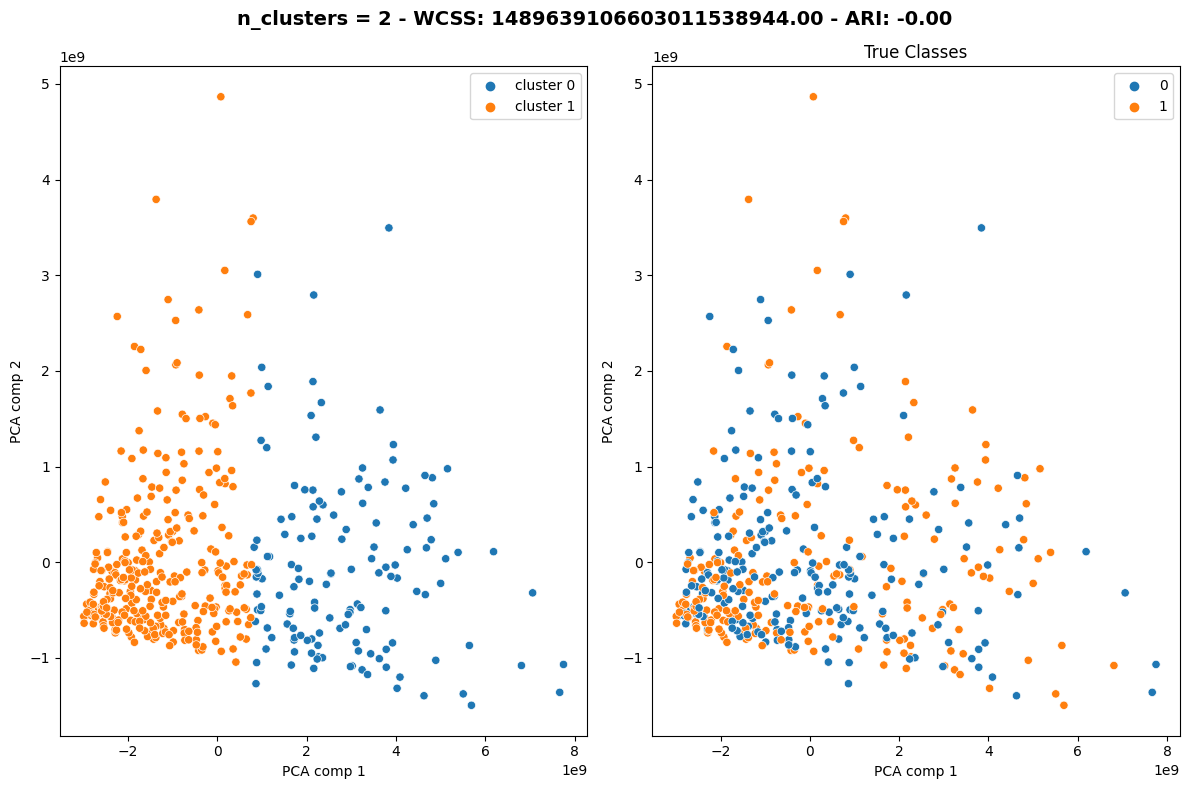

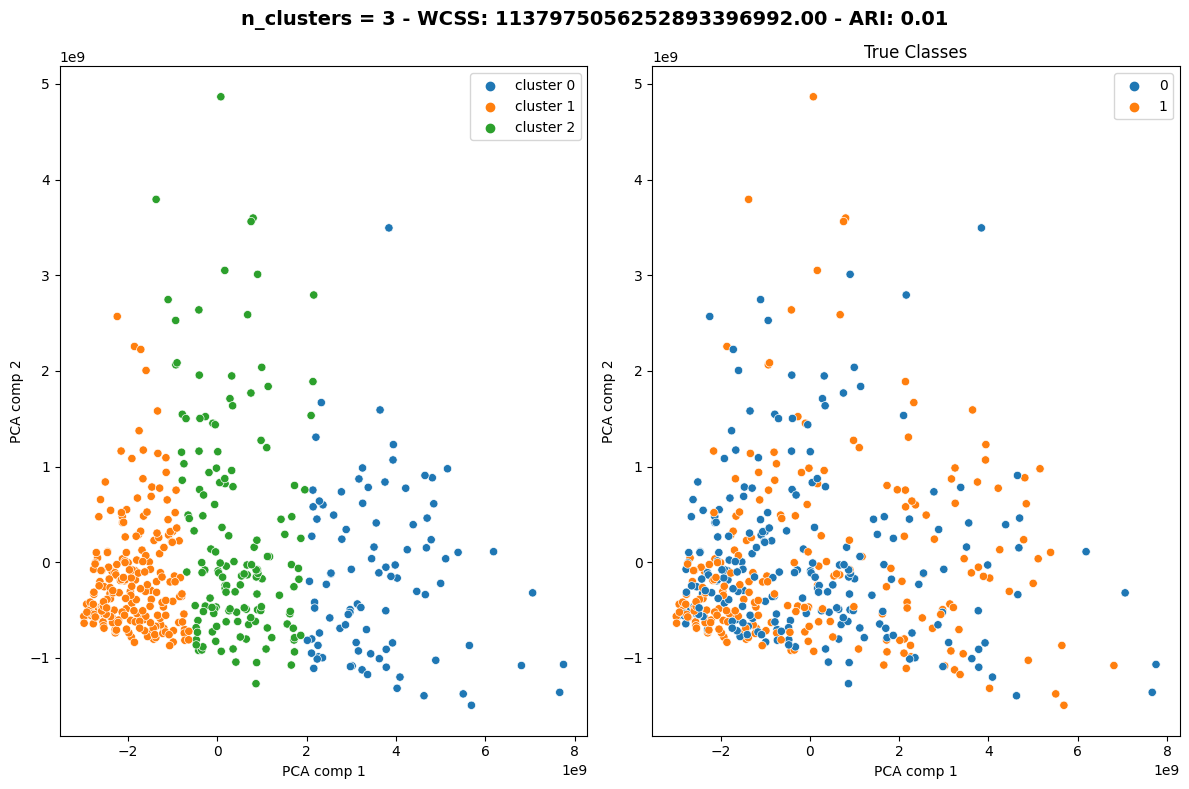

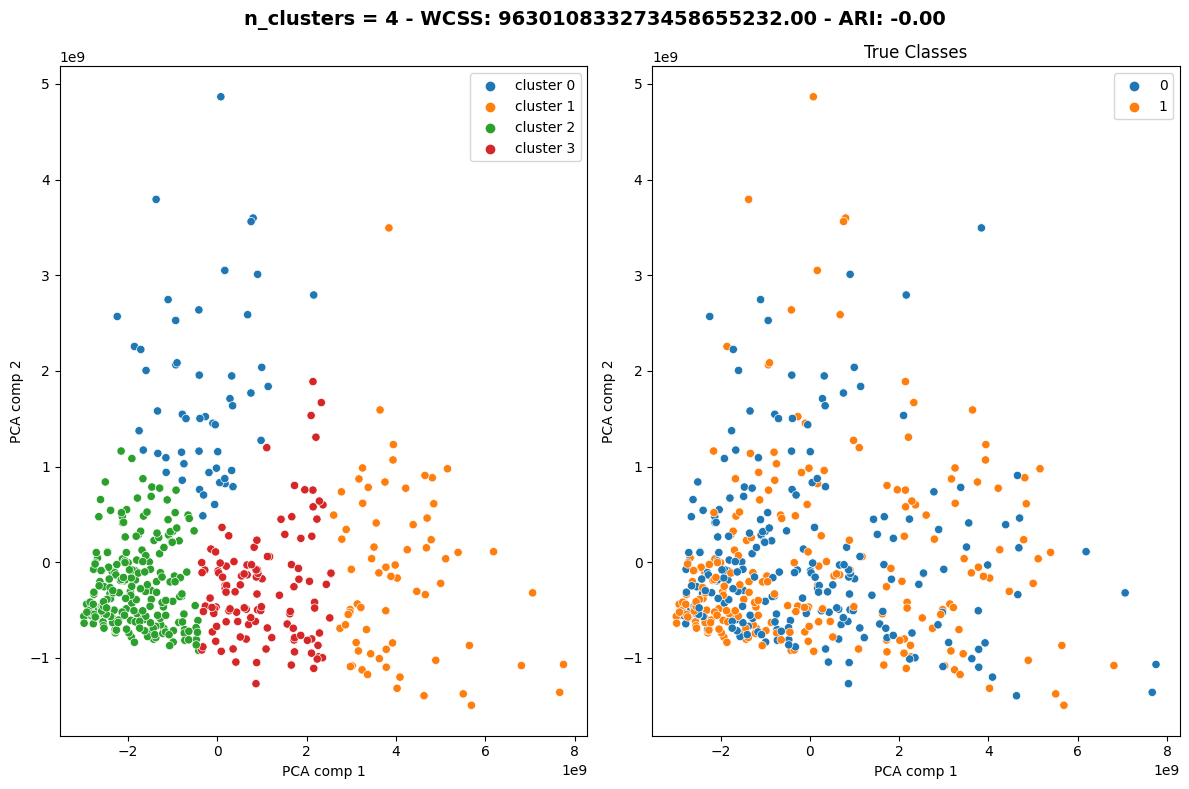

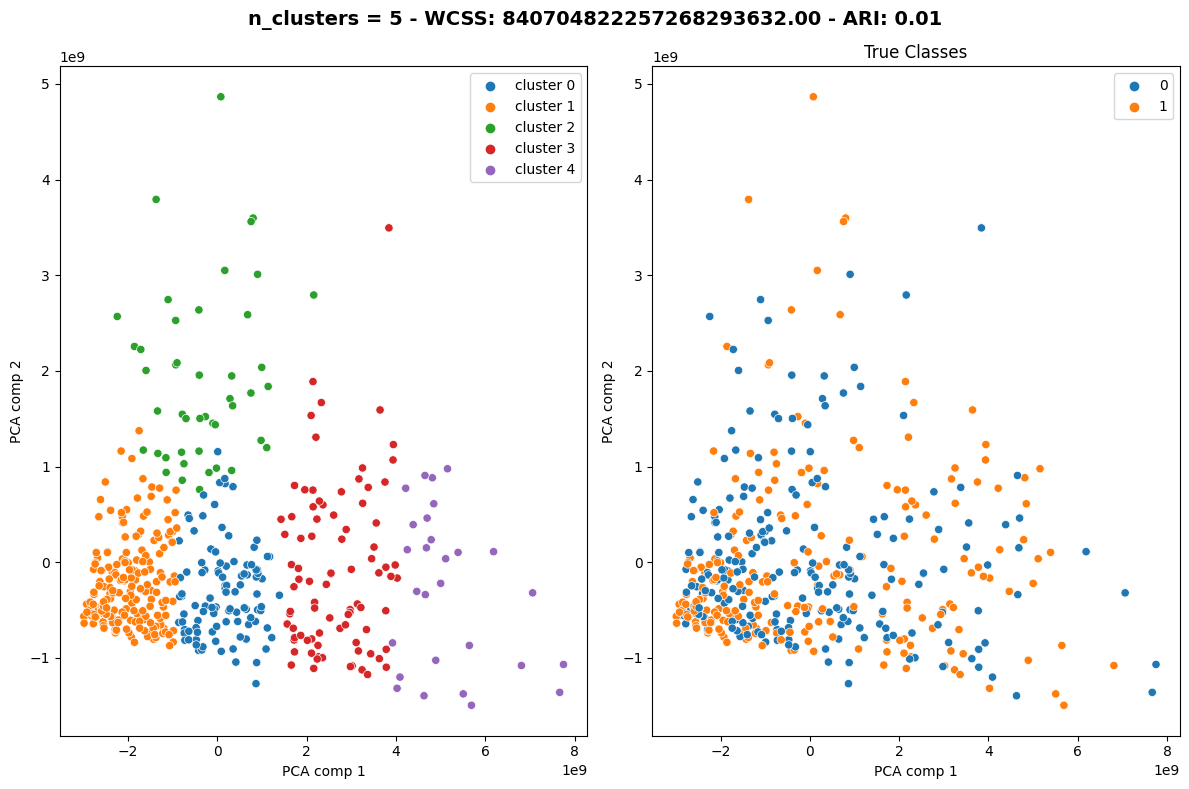

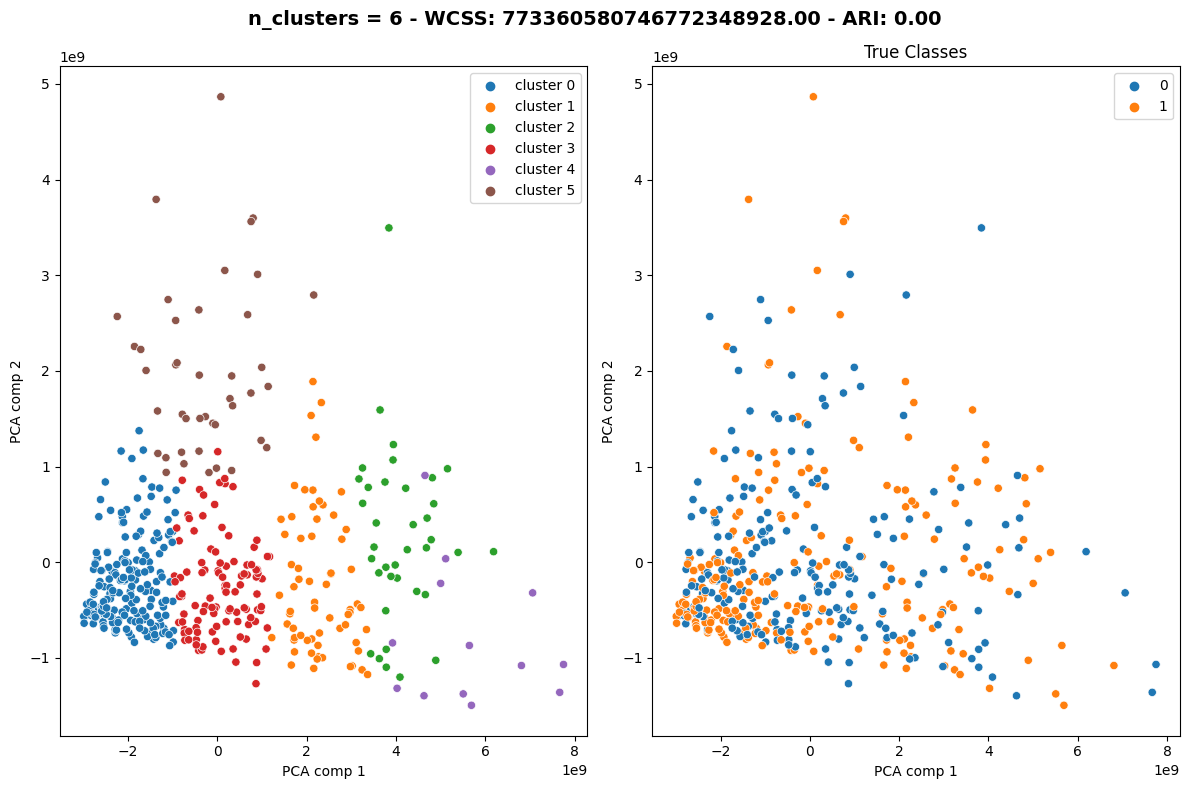

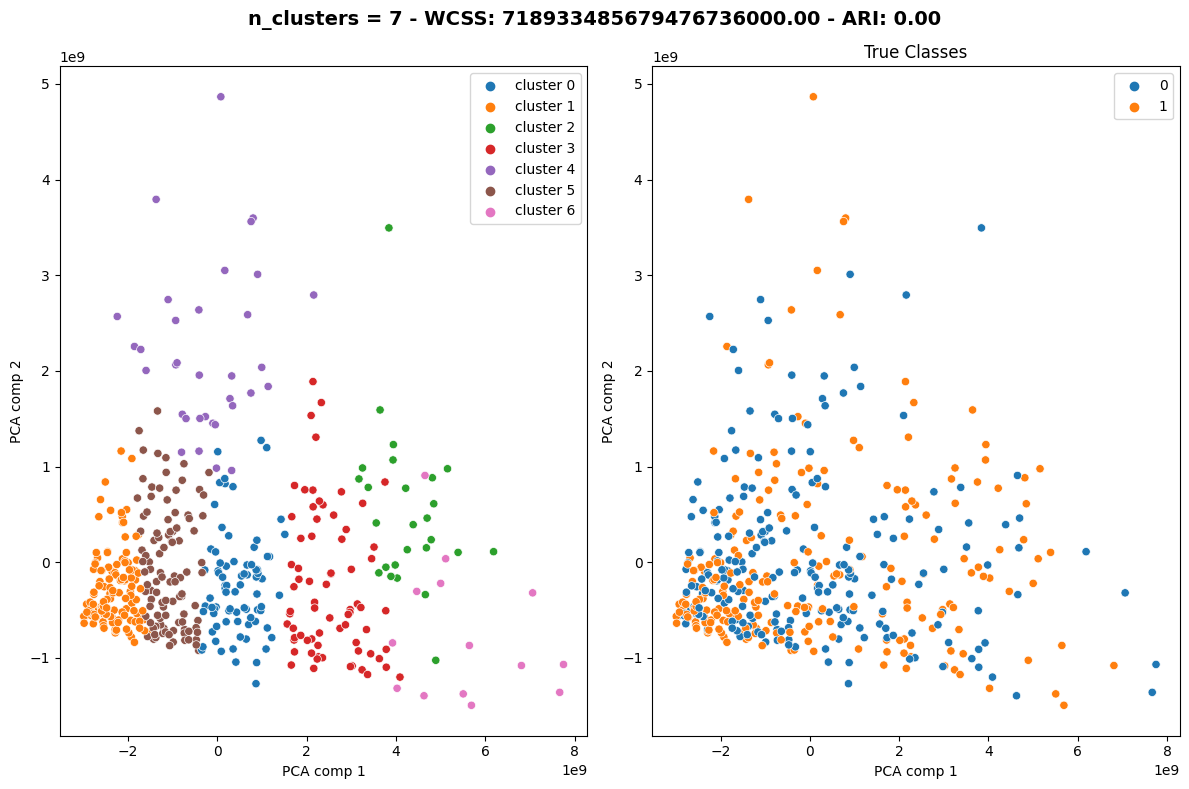

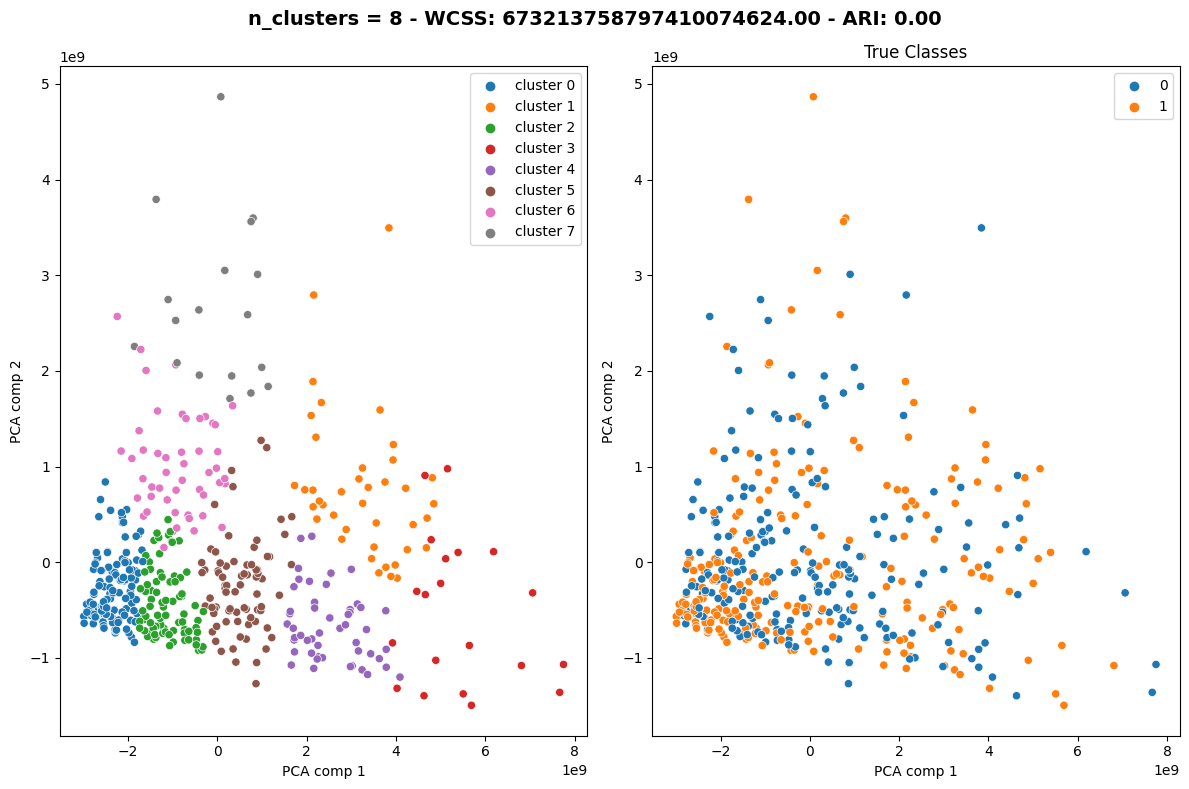

<Figure size 1200x800 with 0 Axes>

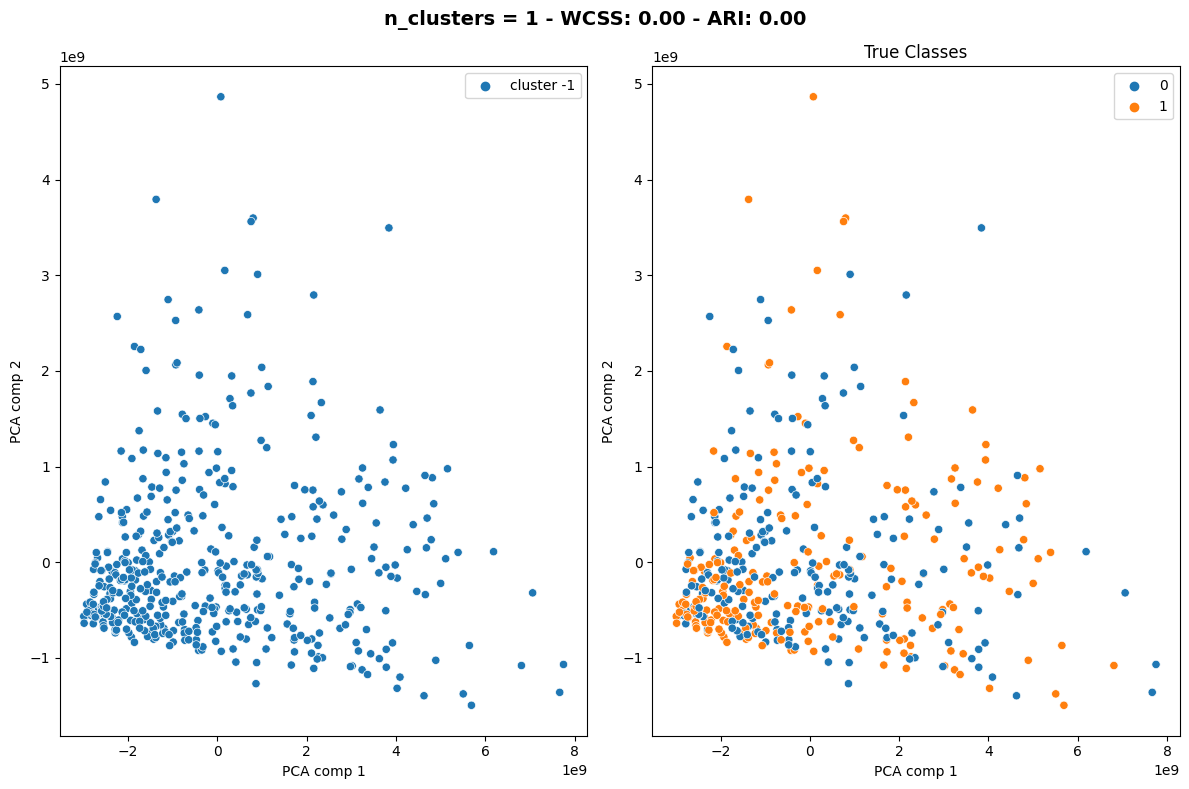

In [238]:

'''
# Read the X and y dataset
X = pd.read_csv('../data/TCGA_preprocessed.csv', header=0, index_col = 0, sep=',')
y = pd.read_csv('../data/outcome.csv', header = 0, index_col = 0)
print("X shape", X.shape)
print("y shape", y.head())
# TODO: remove NaN from y
y= y.dropna(axis=0) #'###'
# TODO: remove from X the samples which correspond to NaN values in y
X = X.loc[y.index]#'###'
print("yshape after removing nans", y.shape)

# TODO: standardize X
scaler = StandardScaler()
X = scaler.fit_transform(X)
# TODO: use the label encoder (le) to encode y into numbers
le = LabelEncoder()
y = le.fit_transform(y)
#print(X.head())
# Create mapping from encoded y to original y and store it in a dictionary.
# This is a global variable that will be used in the plot function.
MAPPING = {i:le.classes_[i] for i in np.arange(len(le.classes_))}
'''
le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)
#print(X.head())
# Create mapping from encoded y to original y and store it in a dictionary.
# This is a global variable that will be used in the plot function.
MAPPING = {i:le.classes_[i] for i in np.arange(len(le.classes_))}

# ##### K-Means #####
# Use the "elbow method" to determine the optimal no of clusters when applying K-Means.
# What range for the number of clusters do you want to test?
# TODO: specify that you want to test a maximum of 10 clusters
max_n_cluster = 10
# TODO: create an array that contains the different number of clusters to evaluate,
# ranging from 2 to max_n_cluster
n_clusters =  np.arange(2, max_n_cluster)
print("n clusters", len(n_clusters))

# TODO: apply K-Means using the function defined above. List names should be 'wcss', 'ari_scores'
wcss , ari_scores = apply_kmeans(X, y, n_clusters)

# TODO: create a figure to show the elbow plot or the distance score (output from kmeans)
# and save it in the folder "output/" with the name Elbow_plot.png.
# Note that you should use multiple lines of code. Remember to put labels, title ...
'###'
plt.clf()
plt.figure(figsize=(10,6))
plt.plot(n_clusters, wcss)
plt.xlabel("Number of K Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Plot from K-Means")
plt.savefig("Elbow_plot.png")
plt.close()
# ##### DBSCAN #####
# scores manually defined to make a search.
# Define a list for eps and min_samples parameters of DBSCAN algorithm
# TODO: define 2 lists on which to iterate to find the best set of DBSCAN hyperparameters. Specify 5 values for each. Have a look at the
# documentation to have an idea of the ranges for the parameters
eps_range = np.linspace(4, 5, 20) #np.arange() ###
min_samples_range = [5, 10, 15, 20] #'###'

# TODO: Use the function that you defined to apply DBSCAN to evaluate the results for all combinations of parameters.
scores_silouhette, scores_ari, summary = apply_dbscan(X, y, eps_range, min_samples_range)
# TODO: extract the 5 best set of hyperparameter combinations according to silouhette score.
# HINT: sort the dataframe and take the first 5 columns
#sort summary according to silouhette and ARI. Look at pandas documentation to sort arrays
#print(summary.head())
#print("summary['silhouette']", summary['silhouette'])
#print("summary['n_clusters']", summary['n_clusters'])
print("summary.head()", summary.head())
summary_silouhette = summary.sort_values(by=['silhouette'], ascending=False)[:5]
print("summary_silouhette.head()")
print(summary_silouhette.head())

# TODO: save the report you created in the function to a csv file in the output folder and name it summary_DBSCAN_silouhette.csv
summary_silouhette.to_csv("summary_DBSCAN_silouhette.csv")
# TODO: extract the 5 best set of hyperparameters according to ARI score.
summary_ari = summary.sort_values(by=['ari'], ascending=False)[:5]
# TODO: save the report you created in the function to a csv file in the output folder and name it summary_DBSCAN_ARI.csv
summary_ari.to_csv('summary_DBSCAN_ARI.csv')
# TODO: extract best values for the hyperparameters according to silouhette score and use those to perform the final clustering (DBSCAN).
#print("summary_silouhette eps 0", summary_silouhette.iloc[0]["eps"])
best_eps, best_min_samples, silouhette = summary_silouhette.iloc[0]["eps"], summary_silouhette.iloc[0]["min_samples"],summary_silouhette.iloc[0]["silhouette"]#max(summary_silouhette, key=lambda x: x[2])
print("best_eps, best_min_samples, silouhette", best_eps, best_min_samples, silouhette)
# compute the performance metrics (both unsupervised and supervised)
# As in the function we check how many clusters the algorithm found
# TODO: unsupervised score
dbscan_best= DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X)
dbscan_best_labels = dbscan_best.labels_
try:
    silhouette = silhouette_score(X, dbscan_best_labels)
except:
    silhouette = 0.0
# TODO: supervised score
ari = adjusted_rand_score(y, dbscan_best_labels)

# TODO: using the 'plot_cluster_vs_actual_class' function that you implemented, plot the groups formed by the clustering algorithm and the true classes.
# Specify algorithm name as 'DBSCAN_silouhette'
#X, y_true, cluster_labels, algorithm, unsupervised_score, supervised_score):
plot_cluster_vs_actual_class(X, y, dbscan_best_labels,'DBSCAN_silhouette', silhouette, ari)

#Visualizations